# Introduction -- Reminder

Each Python lab will start with a pre-flight exercise that walks through building some of the set up and tools ($\sim$ 30 min), followed by an in-class tutorial with time for Q+A (50 min) so you can walk through steps that will be necessary for the homework assignment you will submit ($\sim$ 3 hrs).  Each lab will contain starter code, similar to what you see below.  Please fill in the code to complete the pre-flight assignment in preparation for the in-class tutorial.  

Preflight ($\sim$30-60 min, 10 points) **Typically due: Wednesdays 3pm EST**

*Preflight typically graded by Wednesday 5p EST*

In-class tutorial and Q+A ($\sim$ 50 min, 10 points) **Typically occurs: Thursdays 9am EST**

Homework assignment ($\sim$ 3-5 hrs, 30 points) **Typically due: Mondays 9am EST**  (This one due **Tuesday at 9am** due to Labor day)

*Homework typically graded by Thursday 5p*

When we grade your homework, we will not run your code. Once submitted, your notebook should have the outputs for all of your results.  Please do not include long outputs from debugging, beyond a few print statements and the requested visualizations (i.e. plots).

**Grading:** When we grade your notebook, we will convert the .ipynb file to an HTML file.  We will be using [nbgrader](https://nbgrader.readthedocs.io/en/stable/) to grade your notebooks.  **Note:** Execute the cell below (click in the cell and press shift+enter, or click in the cell and press the Run button) to check that you are using a version of python that is compatible with the tool we are using to grade your assignments.  If your ```IPython``` version is too old, we will *not* be able to grade your assignments.


# Phys 260 Python Lab 1: Introduction to Python: Tutorial (20 points total)

## Tutorial summary
- Plotting the one dimensional electric field due to a point charge
- Comparing a "model" to the data
- Plotting the electric field in 3 dimensions (the meshgrid method for generating points and 3d plotting tools)

### Recall, importing modules with aliases from the pre-flight:

In [1]:
import numpy as np
from matplotlib import pyplot as plt

**Quick questions for the class:** 
- Which of the above modules allows us to plot?
- What does the "as" do in each of the lines above?

**Group Exercise** (5 min - 2 points): 
- Create a numpy array, `rarray`, of numbers ranging from -1 to 1 in steps of 0.005, using the `np.arange` function. (e.g. -1, -095, ... ).  This will represent the radial distance from the origin.
- Print the shape and size of the array.  
- Print the value in `rarray` that is closest to the origin, `r=0` (Hint: Use the np.min and np.abs functions. Look up what they do.)  You'll note that this is interestingly not quite zero.
- Bonus 1: Now, create a numpy array `rarraylin`, using `np.linspace` with numbers ranging from -1 to 1 with 401 number of points. 
- Bonus 2: Print the value in `rarraylin` that is closest to the origin, `r=0`.

In [30]:
#  Create rarray here, and print what you need to print.
### BEGIN SOLUTION
rarray=np.arange(-1,1,0.005)
print(rarray.shape)
print(rarray.size)
print('arange closest to origin: ', np.min(np.abs(rarray)))

rarraylin = np.linspace(-1,1, 401)
print('linspace closest to origin', np.min(np.abs(rarraylin)))
### END SOLUTION

(400,)
400
arange closest to origin:  8.881784197001252e-16
linspace closest to origin 0.0


In [3]:
assert((rarray == np.arange(-1,1,0.005)).all())
assert((rarraylin == np.linspace(-1,1,401)).all())

## Recall functions from the pre-flight. 

Let us assume that `rarray` represents the distance in meters from a point charge at the origin, `q=1`.  

**Group Exercise** (5 min - 4 points):
- Define a function, `calculate_electric_field_magnitude`, that calculates the magnitude of an electric field at distance `r` due to a point charge `q`.  This is given by the one-dimensional version of Coulomb's law: $|\vec{E}|=\frac{kq}{r^2}$, where $k=\frac{1}{4\pi \epsilon_0}$.  

You will need to first define the constants:
```
epsilon_0 = 8.85e-12$  ## in SI units
k = 1 / (4 * np.pi * epsilon_0)   ## coulomb's constant
```


In [144]:
# Define epsilon_0 and k here
### BEGIN SOLUTION
epsilon_0 = 8.85e-12
k = 1/(4*np.pi*epsilon_0)
### END SOLUTION

In [145]:
assert(epsilon_0 == 8.85e-12)
assert(k==1/(4*np.pi*epsilon_0))

In [146]:
def calculate_electric_field_magnitude(r, q) :
    '''Return the magnitude of the electric field here'''
    ### BEGIN SOLUTION
    return k * q / r**2
    ### END SOLUTION

In [7]:
assert(calculate_electric_field_magnitude(1, 1) == k)

**Exercise** (5min - 2 points): Plot the function 
- Plot the `calculate_electric_field_magnitude` as a function of `rarray` for a charge `q=1` Coulomb, and another for a charge `q=100` Coulombs. 
- Note:  Try plotting with and without a log-scale on the y-axis (you'll want to keep the log scale)
- Note:  Make sure to label you axes - the axis labels are often more visible with the key word argument (kwarg), `fontsize='xx-large'`.
- Note:  You can use the kwarg `label` to then add a legend.
- Bonus: Once you get that to work, try swapping out rarray with rarraylin - what happened?

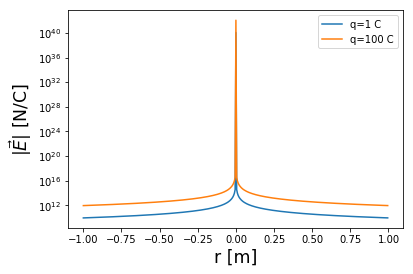

In [32]:
# Plot here
### BEGIN SOLUTION
plt.plot(rarray,calculate_electric_field_magnitude(rarray,1), label='q=1 C')
plt.plot(rarray,calculate_electric_field_magnitude(rarray,100), label='q=100 C')
plt.yscale('log')
plt.xlabel('r [m]', fontsize='xx-large')
plt.ylabel('|$\\vec{E}$| [N/C]', fontsize='xx-large')
plt.legend()
### END SOLUTION

**Question** (2min - 2 points): What is the benefit of having the y-axis on a log scale?

Answer:  

**Quick exercise** (2min - 2 points): Remake the above plot in the cell below, now scaling *both* the x and y axes to log scales.

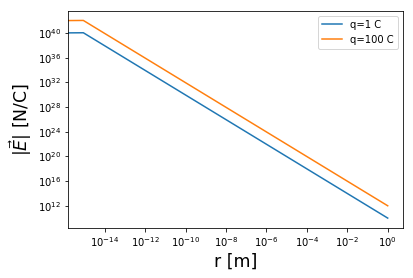

In [9]:
#  Make the same plot above, but with both the x and y axes on a log scale
### BEGIN SOLUTION
plt.plot(rarray,calculate_electric_field_magnitude(rarray,1), label='q=1 C')
plt.plot(rarray,calculate_electric_field_magnitude(rarray,100), label='q=100 C')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('r [m]', fontsize='xx-large')
plt.ylabel('|$\\vec{E}$| [N/C]', fontsize='xx-large')
plt.legend()
### END SOLUTION

Note, because we are looking at the log spacing on the x-axis, only the *positive* values show up. In the cell below, what happens when you execute the base 10 logarithm of -1, e.g. `np.log10(-1)`? 

In [10]:
#  Test here
### BEGIN SOLUTION
np.log10(-1)
### END SOLUTION

/home/avestruz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


nan

Describe output here: 

## Comparing a model to data

Let us assume that Coulomb's law is not yet known, and your plot above corresponds to data that you have taken.

Straight lines on a log-log plot are easier to interpret. In this case the linear relation can be parameterized as: $$\log_{10} E = m* \log_{10} x + b.$$ If you carefully measure with a ruler (or equivalent) you'll find that the slope of this line is close to -2. (E.g., a $1/x^2$ dependence.)  We will use this to construct an eyeballed *model* of the data.  

In general, a model should describe the behavior of data, and make predictions for data at other points. 

Let us focus on the `q=1` case.  The value of $b$ can be read off where $log_{10} x = 0$ (e.g., at x=1), so $b \approx {10}.$ We can check this by plotting this eyeballed model over the field we have already calculated. To do this we need to rearange and invert our linear equation:

$$10^{\log_{10} E} = 10^{m* \log_{10} x + b},$$ which is equivalent to: $$ E = 10^{m* \log_{10} x} 10^ b,$$ and $$ E = 10^{ \log_{10} x^m} 10^ b,$$ which can be simplified to:$$ E = x^m 10^ b.$$ Substituting in our estimates for $b$ and $m$ we have $$E_{eye,model} = 10^{10}x^{-2}.$$

Now we want to check this by plotting our fit against the simulated E-field.  

**Quick exercise** (2min - 2 points): Let us now define a model function,
```model_electric_field```, and over-plot this with the `q=1` curve from above for the rarray points.  Don't forget to examine this with the axes log scaled, label your curves for a legend, and label the axes.

In [11]:
def model_electric_field(x) :
    """Model of the observed electric field"""
    return 1e10/x**2

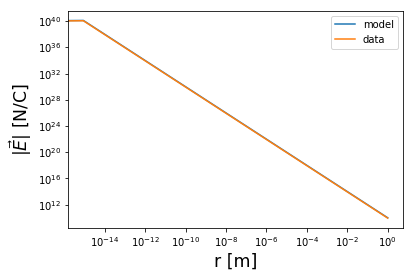

In [12]:
# Over plot the model and "data"
###BEGIN SOLUTION
plt.plot(rarray, model_electric_field(rarray),label='model')
plt.plot(rarray, calculate_electric_field_magnitude(rarray,q=1), label='data')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('r [m]', fontsize='xx-large')
plt.ylabel('|$\\vec{E}$| [N/C]', fontsize='xx-large')
plt.legend()

###END SOLUTION

**Quick exercise** (2min - 2 points): One way to compare data with a model is to look at the ratio between them.  Plot the ratio between the data and model below.  

Text(0,0.5,'|$\\vec{E}$| [N/C]')

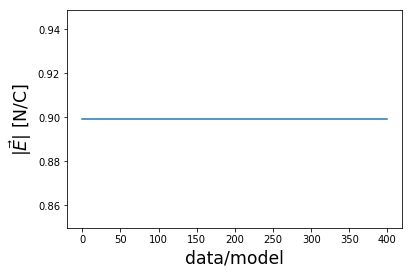

In [13]:
# Plot ratio here
###BEGIN SOLUTION
plt.plot(calculate_electric_field_magnitude(rarray,q=1)/model_electric_field(rarray))
plt.xlabel('data/model', fontsize='xx-large')
plt.ylabel('|$\\vec{E}$| [N/C]', fontsize='xx-large')
###END SOLUTION

Our fit agrees pretty well with the real field, so we have more or less recovered Coulomb's law (i.e. the $1/r^2$ dependence).  We have the correct scaling, $r^{-2}$.  But, the model differs from the data by a constant factor of $k = 0.899 \times 10^{10}$. This was difficult to see in the over-plotted on the log-log plot, but this is clear in a ratio of the two.

## Coulomb's law in 3d

The electric field is introduced by dividing both sides of coulomb's law by $q$. This results in:

$$\vec E := \frac {\vec F} q = \frac 1 {4\pi\epsilon_0} \frac {Q}{{\vec{r}}^2} \hat{r} $$ Here $\vec{r}\equiv \vec{r_i} - \vec{r_Q}$ where $\vec{r_i}$ is the point in space at which we evaluate the field due to a charge Q sitting at $\vec{r_Q}$. This is a vector field. That is, at each point in space we have a vector representing the magnitude and direction of the electric field at that point.

**Exercise** (5min - 2 points):  Analogous to how we used np.arange (or np.linspace) to define a variable `rarray`,  representing positions in 1-d space, we can define positions in 3-d space.  We will do this using the `np.meshgrid` function for this.  Let us define xarray, yarray, and zarray positions in a box from $-1\leq x, y, z\leq 1$ in steps of 2.  `np.linspace` is somewhat similar to np.arange, but typically rounds the array elements nicely for the end point (try googling "numpy linspace vs. arange"). We start and stop at 1.05 so we do not hit the origin exactly.  This is to avoid the electric field calculation from blowing up when we place a charge at the origin (the plot would look quite messy). 
```
num_points_1d = 2
sample_points = np.linspace(-1, 1, num=num_points_1d)
xarray, yarray, zarray = np.meshgrid(sample_points, sample_points, sample_points, indexing='ij')
```

Note, we have used the kwarg `indexing='ij'` for x, y, z cycling arrays.  Without specifying this keyword, The default is y, x, z.  Define the xarray, yarray, and zarray variables as shown above, then examine these arrays (e.g. what are their sizes and shapes?  what are their contents?) 

In [233]:
# Define xarray, yarray, zarray here
###BEGIN SOLUTION
num_points_1d = 2
sample_points = np.linspace(-1,1,num=num_points_1d)
xarray, yarray, zarray = np.meshgrid(sample_points, sample_points, sample_points, indexing='ij')
print('size:', xarray.size)
print('shape:', xarray.shape)
print('xarray:', xarray)
print('yarray:', yarray)
print('zarray:', zarray)
###END SOLUTION

size: 8
shape: (2, 2, 2)
xarray: [[[-1. -1.]
  [-1. -1.]]

 [[ 1.  1.]
  [ 1.  1.]]]
yarray: [[[-1. -1.]
  [ 1.  1.]]

 [[-1. -1.]
  [ 1.  1.]]]
zarray: [[[-1.  1.]
  [-1.  1.]]

 [[-1.  1.]
  [-1.  1.]]]


**Interpretation Question**: From examination and/or reading online documentation of meshgrid, what does each element in each array correspond to?

Meshgrid outputs the x, y, and z coordinate values for every point in the meshgrid.  

In [199]:
"""Run this cell to make sure you have properly defined sample_points"""
assert((sample_points == np.linspace(-1,1,num_points_1d)).all())
xtest, ytest, ztest = np.meshgrid(sample_points, sample_points, sample_points, indexing='ij')
assert((xtest==xarray).all())
assert((ytest==yarray).all())
assert((ztest==zarray).all())

**Electric field in 3 dimensions** Let us now define a function that outputs the 3 dimensional electric field due to a point charge.  First, it is useful to have a function that outputs the euclidean distance between two points.  

 This can be accomplished with the numpy built-in function, `np.linalg.norm`.  This function is in the `linalg` module of the `numpy` library. You can think of a module as a unit collection of common tools.  In this case, `linalg` has a bunch of linear algebra operations.   Note, this is the same as doing something along the lines of:
 ```
 np.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2)
 ```

In [200]:
# First, we define two position vectors
a = np.array([1,1,1])
b = np.array([0,0,1])

# Now we find the euclidean distance between the to positions
np.linalg.norm(a-b)

1.4142135623730951

In [201]:
def calculate_efield_at_point(charge_position, field_position, q=1) :
    '''Return the electric field due to a point charge.
    
    Inputs:
    charge_position (n-darray) : x, y, and z position vector
    field_positions_x (n-darray) : x coordinates of the field
    field_positions_y (n-darray) : y coordinates of the field
    field_positions_z (n-darray) : z coordinates of the field
    q (float or int) : charge of the point
    Outputs:
    vector_efield (n-darray) : x, y, z components of the e-field at the point field_position
    '''
    
    r = field_position-charge_position
    r_magnitude = np.linalg.norm(field_position-charge_position)
    r_unit = r/r_magnitude
    
    return k*q / r_magnitude**2 * r_unit

You can now imagine calculating the e-field due to a charge at the origin, where we've now calculated the field at at every point generated by the meshgrid.  We can do this for the meshgrid we generated comprised of four points.  It would look like the following:

In [202]:
# First unravel the xarray, yarray, and zarray so we can loop over the elements:
# In the loop calculate the e-field, collect into a list
# Convert list into a numpy array that gets reshaped

efield_list = []
charge_position = np.array([0,0,0])

for x, y, z in zip(np.ravel(xarray), np.ravel(yarray), np.ravel(zarray)) :
    field_position = np.array([x,y,z])
    print("Calculating efield at: ", field_position)
    efield_at_point = calculate_efield_at_point(charge_position, field_position, q=1) 
    print("efield is: ", efield_at_point)
    efield_list.append(efield_at_point)
    

Calculating efield at:  [-1. -1. -1.]
efield is:  [-1.73047362e+09 -1.73047362e+09 -1.73047362e+09]
Calculating efield at:  [-1.         -1.         -0.77777778]
efield is:  [-2.13870414e+09 -2.13870414e+09 -1.66343656e+09]
Calculating efield at:  [-1.         -1.         -0.55555556]
efield is:  [-2.56337405e+09 -2.56337405e+09 -1.42409670e+09]
Calculating efield at:  [-1.         -1.         -0.33333333]
efield is:  [-2.93143472e+09 -2.93143472e+09 -9.77144908e+08]
Calculating efield at:  [-1.         -1.         -0.11111111]
efield is:  [-3.14987259e+09 -3.14987259e+09 -3.49985843e+08]
Calculating efield at:  [-1.         -1.          0.11111111]
efield is:  [-3.14987259e+09 -3.14987259e+09  3.49985843e+08]
Calculating efield at:  [-1.         -1.          0.33333333]
efield is:  [-2.93143472e+09 -2.93143472e+09  9.77144908e+08]
Calculating efield at:  [-1.         -1.          0.55555556]
efield is:  [-2.56337405e+09 -2.56337405e+09  1.42409670e+09]
Calculating efield at:  [-1.    

efield is:  [-2.63829125e+10 -8.79430417e+09 -2.63829125e+10]
Calculating efield at:  [-0.33333333 -0.11111111 -0.11111111]
efield is:  [-5.98913512e+10 -1.99637837e+10 -1.99637837e+10]
Calculating efield at:  [-0.33333333 -0.11111111  0.11111111]
efield is:  [-5.98913512e+10 -1.99637837e+10  1.99637837e+10]
Calculating efield at:  [-0.33333333 -0.11111111  0.33333333]
efield is:  [-2.63829125e+10 -8.79430417e+09  2.63829125e+10]
Calculating efield at:  [-0.33333333 -0.11111111  0.55555556]
efield is:  [-1.05523958e+10 -3.51746527e+09  1.75873263e+10]
Calculating efield at:  [-0.33333333 -0.11111111  0.77777778]
efield is:  [-4.82142174e+09 -1.60714058e+09  1.12499840e+10]
Calculating efield at:  [-0.33333333 -0.11111111  1.        ]
efield is:  [-2.51704541e+09 -8.39015136e+08  7.55113622e+09]
Calculating efield at:  [-0.33333333  0.11111111 -1.        ]
efield is:  [-2.51704541e+09  8.39015136e+08 -7.55113622e+09]
Calculating efield at:  [-0.33333333  0.11111111 -0.77777778]
efield i

efield is:  [ 2.95294344e+09 -5.31529818e+09  1.77176606e+09]
Calculating efield at:  [ 0.55555556 -1.          0.55555556]
efield is:  [ 2.42881784e+09 -4.37187212e+09  2.42881784e+09]
Calculating efield at:  [ 0.55555556 -1.          0.77777778]
efield is:  [ 1.88714096e+09 -3.39685373e+09  2.64199735e+09]
Calculating efield at:  [ 0.55555556 -1.          1.        ]
efield is:  [ 1.42409670e+09 -2.56337405e+09  2.56337405e+09]
Calculating efield at:  [ 0.55555556 -0.77777778 -1.        ]
efield is:  [ 1.88714096e+09 -2.64199735e+09 -3.39685373e+09]
Calculating efield at:  [ 0.55555556 -0.77777778 -0.77777778]
efield is:  [ 2.66958788e+09 -3.73742303e+09 -3.73742303e+09]
Calculating efield at:  [ 0.55555556 -0.77777778 -0.55555556]
efield is:  [ 3.69699699e+09 -5.17579578e+09 -3.69699699e+09]
Calculating efield at:  [ 0.55555556 -0.77777778 -0.33333333]
efield is:  [ 4.81598083e+09 -6.74237317e+09 -2.88958850e+09]
Calculating efield at:  [ 0.55555556 -0.77777778 -0.11111111]
efield i

**Note:** I should emphasize that this is *not* how you will want to do calculations with numpy arrays.  But, this is the most illustrative so you can see what we want to do in a step-by-step manner.  You should be able to *vectorize* the action of calculating the electric field.  We will do that in the second week.  The code above is to illustrate how you might perform this type of an action, and you will see how to do it in a vectorized fashion later.

**Exercise**: Based on what was illustrated in the preflight, explain why this is not what you want to do with numpy arrays. e.g. "We don't want to... when we calculate the electric field at all points in the grid because..."

We don't want to loop over individual elements when we calculate the electric field at all points in the grid.  This is because it is slow, and possibly even more prone to mistakes.

### Plotting the vector field

You will notice that the e-field at each point is a vector (electric field is a vector field).  Let's visualize the electric field in 3 dimensions.  There are multiple ways to do this with matplotlib tools.  I personally like the `streamplot` method [documentation here](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.streamplot.html).  

Here, let us color code the arrows based on the magnitude of the electric field.  We can quickly calculate the magnitude with the same `np.linalg.norm` function.  But, now, we need to do this along a specified axis (axis is a kwarg for this function) corresponding to each point in space.  

**Exercise 1** (1 points):  In the cell below, first define `efield_vectors` by turning `efield_list` into a numpy array.  For any list of numbers, `list`, you can use this to define an array with, `new_array=np.array(list)`.

**Exercise 2** (1 points):  Next, define a variable `efield_magnitude` that corresponds to the magnitude of the electric field at each point.  Use the `np.linalg.norm` function.  You'll need to input the array form of the efield_list, i.e. `np.array(efield_list)` as an argument to the function.  Note, I always lose track of which axis to use, but I know I should have as many values of a magnitude as I have points.  So, trial-and-error is a fair approach.  
You can try defining `efield_magnitude`, and printing its contents immediately after.

In [203]:
### BEGIN SOLUTION
efield_vectors = np.array(efield_list)
efield_magnitude = np.linalg.norm(efield_vectors, axis=1)
print(efield_magnitude)
print(efield_vectors.shape)
print(efield_vectors[:,1])
### END SOLUTION

[2.99726823e+09 3.45183024e+09 3.89484588e+09 4.25927591e+09
 4.46832012e+09 4.46832012e+09 4.25927591e+09 3.89484588e+09
 3.45183024e+09 2.99726823e+09 3.45183024e+09 4.06891721e+09
 4.69894310e+09 5.23982863e+09 5.55981817e+09 5.55981817e+09
 5.23982863e+09 4.69894310e+09 4.06891721e+09 3.45183024e+09
 3.89484588e+09 4.69894310e+09 5.55981817e+09 6.33335809e+09
 6.80688019e+09 6.80688019e+09 6.33335809e+09 5.55981817e+09
 4.69894310e+09 3.89484588e+09 4.25927591e+09 5.23982863e+09
 6.33335809e+09 7.35693111e+09 8.00369429e+09 8.00369429e+09
 7.35693111e+09 6.33335809e+09 5.23982863e+09 4.25927591e+09
 4.46832012e+09 5.55981817e+09 6.80688019e+09 8.00369429e+09
 8.77513470e+09 8.77513470e+09 8.00369429e+09 6.80688019e+09
 5.55981817e+09 4.46832012e+09 4.46832012e+09 5.55981817e+09
 6.80688019e+09 8.00369429e+09 8.77513470e+09 8.77513470e+09
 8.00369429e+09 6.80688019e+09 5.55981817e+09 4.46832012e+09
 4.25927591e+09 5.23982863e+09 6.33335809e+09 7.35693111e+09
 8.00369429e+09 8.003694

In [204]:
"""Run this cell to check that you have properly defined efield_vectors and efield_magnitude"""
assert(efield_vectors[0][0] == efield_list[0][0])
assert((efield_vectors == np.array(efield_list)).all())
### BEGIN HIDDEN TESTS
assert((efield_magnitude == np.linalg.norm(efield_vectors, axis=1)).all())
### END HIDDEN TESTS

Now, we plot the vector field.  Let's first try the method `quiver` [quiver documentation](https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.quiver.html).  Note, next time we experiment with using the `streamplot` method [streamplot documentation](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.streamplot.html).

Text(0.5,1,'E Field of Point Charge')

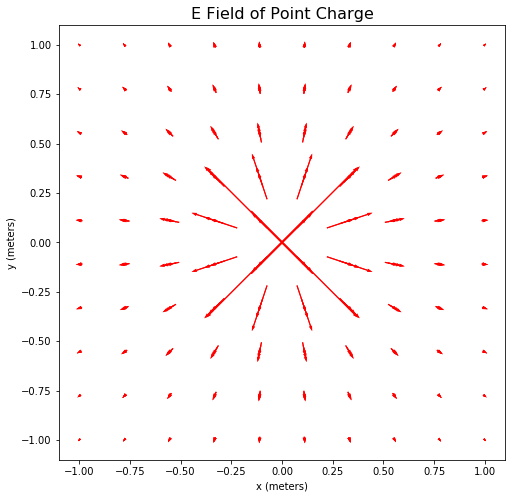

In [205]:
#  Plot the vector field using the quiver method
fig, ax1 = plt.subplots(1, figsize=(8,8))
ax1.quiver(xarray, yarray, efield_vectors[:,0], efield_vectors[:,1], pivot='mid', color='r')
ax1.set_xlabel('x (meters)')
ax1.set_ylabel('y (meters)')
ax1.set_title('E Field of Point Charge', fontsize=16)

**Exercise**:  Let's describe plot behavior changes when we change input arguments (args) or key word arguments (kwargs).  Now, go back to where we defined the `efield_vectors` by calculating the electric field at each point, and change the calculation for a charge `q=-1`.  Execute that cell and following cells to remake the above plot.  What happened?  Now, go back to where we defined the number of points along each axis, and change the number of steps, `num_points_1d` to 10. Execute all of the cells to re-remake the above plot.  What happened?

The points point inwards when we change the sign of the charge.  We sample more points in the field when we increase `num_points_1d`.

# Phys 260 Python Lab 1: Introduction to Python: Homework (10 points total)


Your homework assignment begins here.  Note, the homework below relies on code built during the tutorial (above)

## Homework summary
- Calculate the electric field due to a dipole
- Plot the electric field due to a dipole

## Calculating the electric field (4 points)
A dipole consists of a pair of charges one positive and one negative (with the same charge magnitude) separated by a fixed distance. Consider a dipole consisting of a q$_-$ = -1 C charge located at $x = 0, y = 0, z = 0.5$ and a q$_+$ = 1 C charge located at $x = 0, y = 0, z = -0.5$.

Below is the skeleton of the function `calculate_efield_from_dipole`.  It contains the name of the function, the names of the input arguments and key word arguments.  You'll notice that this is very similar to `calculate_efield_at_point`.  

(1) Appropriately **fill in the docstrings** (documentation string) enclosed by triple quotes, and see the `calculate_efield_at_point` as an example. (1pts)

(2) **Fill in the function** to calculate the efield due to a dipole by using `calculate_efield_at_point` to calculate the efield due to the q$_-$ and the efield due to the q$_+$ charge, the use the principle of superposition.  You should be able to do this in 1-3 lines of code.  Full credit for using `calculate_efield_at_point` appropriately *instead of rewriting code.* (3 pts, but only 1 pt if you rewrote code)

In [217]:
def calculate_efield_from_two_charges(charge_1_position, charge_2_position, field_position, q1=-1, q2=1) :
    '''Return the electric field due to two charges.
    
    Inputs:
    
    Outputs:
    
    '''
    ### BEGIN SOLUTION
    efield_minus = calculate_efield_at_point(charge_1_position, field_position, q=q1)
    efield_plus = calculate_efield_at_point(charge_2_position, field_position, q=q2)
    return efield_minus + efield_plus
    ### END SOLUTION

In [231]:
"""Execute this cell to check if you've properly defined the function above"""
from math import isclose

charge_1_pos = np.array([0,0,0.5])
charge_2_pos = np.array([0,0,-0.5])
test_point = np.array([0,0,10])
test_efield = calculate_efield_from_two_charges(charge_1_pos, charge_2_pos, test_point)
assert(isclose(test_efield[2], -18073865.75603393, rel_tol=1e-10))
### BEGIN HIDDEN TESTS
orig_efield = calculate_efield_at_point
del calculate_efield_at_point
try:
    calculate_efield_at_point(charge_1_pos, test_point)
except NameError:
    pass
else:
    raise AssertionError("calculate_efield_from_two_charges does not use calculate_efield_at_point (-2pts)")
finally:
    calculate_efield_at_point = orig_efield
### END HIDDEN TESTS

## Calculate the dipole electric field on the meshgrid (3 points)

Look back at the loop we used to calculate the electric field due to a point.  Use similar code to do this for the dipole electric field.  The skeleton for this is below.  

Hints:
- You will want to change how you define the variable `efield_at_point` inside the loop.
- You will need to use the charge_1_pos and charge_2_pos defined in the cell above as arguments.

In [219]:
dipole_efield_list = []

for x, y, z in zip(np.ravel(xarray), np.ravel(yarray), np.ravel(zarray)) :
    field_position = np.array([x,y,z])
    print("Calculating efield at: ", field_position)

### BEGIN SOLUTION
    efield_at_point = calculate_efield_from_two_charges(charge_1_pos, charge_2_pos, field_position) 
    print("efield is: ", efield_at_point)
### END SOLUTION
    
    dipole_efield_list.append(efield_at_point)
    
dipole_efield_vectors = np.array(dipole_efield_list)

Calculating efield at:  [-1. -1. -1.]
efield is:  [-1.63796409e+09 -1.63796409e+09  2.07292295e+08]
Calculating efield at:  [-1.         -1.         -0.77777778]
efield is:  [-1.70492522e+09 -1.70492522e+09  8.25082287e+08]
Calculating efield at:  [-1.         -1.         -0.55555556]
efield is:  [-1.53557121e+09 -1.53557121e+09  1.55085750e+09]
Calculating efield at:  [-1.         -1.         -0.33333333]
efield is:  [-1.08095725e+09 -1.08095725e+09  2.21318593e+09]
Calculating efield at:  [-1.         -1.         -0.11111111]
efield is:  [-3.90712923e+08 -3.90712923e+08  2.61103645e+09]
Calculating efield at:  [-1.         -1.          0.11111111]
efield is:  [3.90712923e+08 3.90712923e+08 2.61103645e+09]
Calculating efield at:  [-1.         -1.          0.33333333]
efield is:  [1.08095725e+09 1.08095725e+09 2.21318593e+09]
Calculating efield at:  [-1.         -1.          0.55555556]
efield is:  [1.53557121e+09 1.53557121e+09 1.55085750e+09]
Calculating efield at:  [-1.         -1. 

efield is:  [-1.83569872e+08 -1.65212885e+09  6.15431256e+09]
Calculating efield at:  [-0.11111111 -1.          0.11111111]
efield is:  [1.83569872e+08 1.65212885e+09 6.15431256e+09]
Calculating efield at:  [-0.11111111 -1.          0.33333333]
efield is:  [4.93781823e+08 4.44403640e+09 4.77319416e+09]
Calculating efield at:  [-0.11111111 -1.          0.55555556]
efield is:  [6.54224679e+08 5.88802211e+09 2.57247068e+09]
Calculating efield at:  [-0.11111111 -1.          0.77777778]
efield is:  [6.46289226e+08 5.81660303e+09 4.74502464e+08]
Calculating efield at:  [-0.11111111 -1.          1.        ]
efield is:  [ 5.34873958e+08  4.81386562e+09 -8.80942065e+08]
Calculating efield at:  [-0.11111111 -0.77777778 -1.        ]
efield is:  [-1.03120149e+09 -7.21841042e+09 -2.78840743e+09]
Calculating efield at:  [-0.11111111 -0.77777778 -0.77777778]
efield is:  [-1.43040001e+09 -1.00128001e+10 -9.11761595e+08]
Calculating efield at:  [-0.11111111 -0.77777778 -0.55555556]
efield is:  [-1.6061

efield is:  [-3.01960432e+09 -4.22744604e+09  5.31556861e+09]
Calculating efield at:  [0.55555556 0.77777778 0.55555556]
efield is:  [-3.96190830e+09 -5.54667163e+09  2.71779281e+09]
Calculating efield at:  [0.55555556 0.77777778 0.77777778]
efield is:  [-3.83618982e+09 -5.37066575e+09  2.94915504e+08]
Calculating efield at:  [0.55555556 0.77777778 1.        ]
efield is:  [-3.09218900e+09 -4.32906460e+09 -1.18496345e+09]
Calculating efield at:  [ 0.55555556  1.         -1.        ]
efield is:  [ 1.82304260e+09  3.28147668e+09 -3.01307114e+08]
Calculating efield at:  [ 0.55555556  1.         -0.77777778]
efield is:  [2.07185362e+09 3.72933651e+09 7.46554686e+08]
Calculating efield at:  [ 0.55555556  1.         -0.55555556]
efield is:  [2.00052081e+09 3.60093746e+09 2.18424241e+09]
Calculating efield at:  [ 0.55555556  1.         -0.33333333]
efield is:  [1.47132766e+09 2.64838978e+09 3.61313652e+09]
Calculating efield at:  [ 0.55555556  1.         -0.11111111]
efield is:  [5.42247357e+0

In [232]:
"""Execute this cell to check that you have properly defined the dipole efield vectors"""
charge_1_pos = np.array([0,0,0.5])
charge_2_pos = np.array([0,0,-0.5])
test_point = np.array([-1,-1,-1])
test_efield = calculate_efield_from_two_charges(charge_1_pos, charge_2_pos, test_point)

assert((test_efield==dipole_efield_vectors[0]).all())

##  Plot on plane of dipole (3 pts)

Plot on a plane parallel to that of the dipole (i.e. the yz-plane)

Text(0.5,1,'E Field of Dipole')

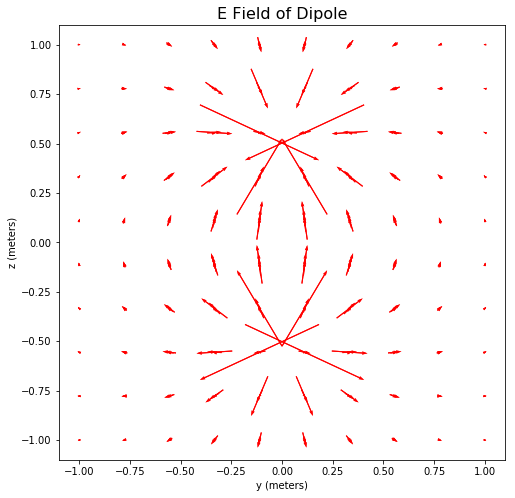

In [223]:
#  Plot the vector field using the quiver method
fig, ax1 = plt.subplots(1, figsize=(8,8))

### BEGIN SOLUTION
ax1.quiver(yarray, zarray, dipole_efield_vectors[:,1], dipole_efield_vectors[:,2], pivot='mid', color='r')
### END SOLUTION

ax1.set_xlabel('y (meters)')
ax1.set_ylabel('z (meters)')
ax1.set_title('E Field of Dipole', fontsize=16)